##IPL 2022 capston Project 

The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
pd.__version__

'2.2.2'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#load data 
df = pd.read_csv('IPL.csv')
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [9]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [10]:
df.shape

(74, 20)

In [11]:
print(f'rows are {df.shape[0]} and columns are {df.shape[1]}')

rows are 74 and columns are 20


In [12]:
df.size

1480

In [13]:
print(f'size of the data is {df.size}')

size of the data is 1480


In [14]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [15]:
df.isnull()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

# 1 Which team won the most matches ?

In [17]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [18]:
df.match_winner.value_counts()

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most win team')

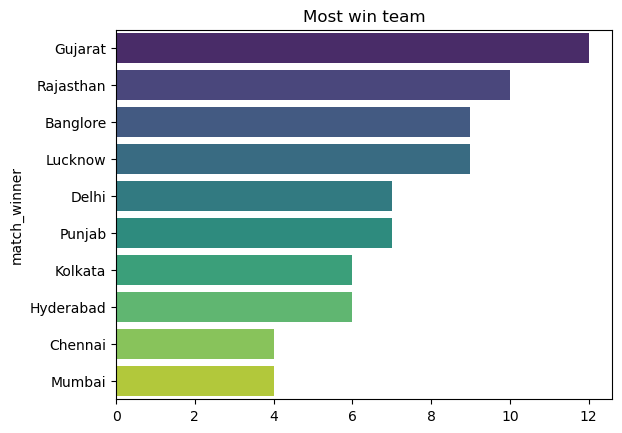

In [19]:
match_wins = df.match_winner.value_counts()
sns.barplot(y = match_wins.index,x = match_wins.values,palette='viridis')
plt.title('Most win team')

# 2 Tose Ddecision Trends

Text(0.5, 1.0, 'Toss Decision Trends')

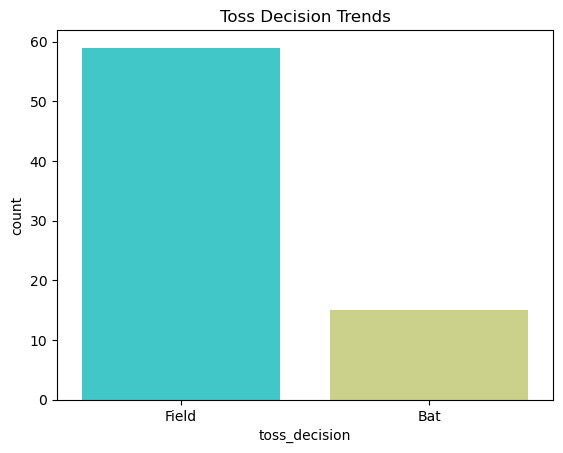

In [20]:
sns.countplot(x = df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Trends')
# most of choose fielding , sme of choose batting

# 3. Toss winner vs Match winner 

In [21]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [22]:
df[df['toss_winner'] == df['match_winner']]

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128,10,132,7,Banglore,Wickets,3,Wanindu Hasaranga,Sherfane Rutherford,28,Wanindu Hasaranga,4--20
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,211,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24
7,8,"April 1,2022","Wankhede Stadium, Mumbai",Kolkata,Punjab,Group,Kolkata,Field,137,10,141,4,Kolkata,Wickets,6,Umesh Yadav,Andre Russell,70,Umesh Yadav,4--23
12,13,"April 5,2022","Wankhede Stadium, Mumbai",Banglore,Rajasthan,Group,Banglore,Field,169,3,173,6,Banglore,Wickets,4,Dinesh Karthik,Jos Buttler,70,Yuzvendra Chahal,2--15
13,14,"April 6,2022","Maharashtra Cricket Association Stadium,Pune",Kolkata,Mumbai,Group,Kolkata,Field,161,4,162,5,Kolkata,Wickets,5,Pat Cummins,Pat Cummins,56,Murugan Ashwin,2--25
14,15,"April 7,2022","Dr DY Patil Sports Academy, Mumbai",Delhi,Lucknow,Group,Lucknow,Field,149,3,155,4,Lucknow,Wickets,6,Quinton de Kock,Quinton de Kock,80,Ravi Bishnoi,2--22


In [23]:
df[df['toss_winner'] == df['match_winner']].count()

match_id               36
date                   36
venue                  36
team1                  36
team2                  36
stage                  36
toss_winner            36
toss_decision          36
first_ings_score       36
first_ings_wkts        36
second_ings_score      36
second_ings_wkts       36
match_winner           36
won_by                 36
margin                 36
player_of_the_match    36
top_scorer             36
highscore              36
best_bowling           36
best_bowling_figure    36
dtype: int64

In [24]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
count

36

In [25]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count* 100)/df.shape[0]
percentage.round(2)

48.65

# 4 How do team win ?(Run vs Wickets)

In [26]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


<Axes: xlabel='won_by', ylabel='count'>

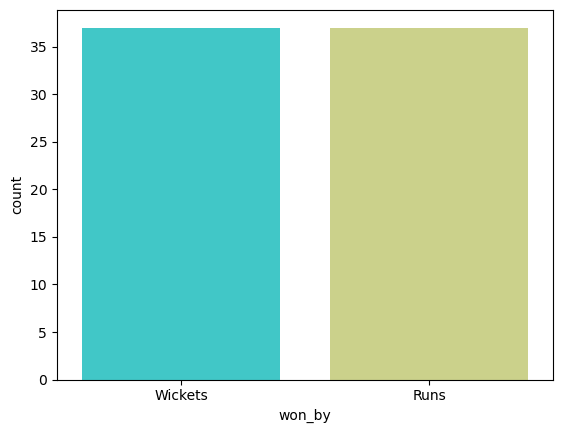

In [27]:
sns.countplot(x=df['won_by'],palette='rainbow')

# key player performance 

# 1 most "Player of the match " Award ?

In [28]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [29]:
count = df['player_of_the_match'].value_counts()
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Umesh Yadav          2
Quinton de Kock      2
David Miller         2
Umran Malik          2
K L Rahul            2
Rahul Tripathi       2
Hardik Pandya        2
Jasprit Bumrah       2
Shubman Gill         2
Yuzvendra Chahal     2
Wanindu Hasaranga    2
Avesh Khan           2
Dinesh Karthik       2
Virat Kohli          1
Rinku Singh          1
Kagiso Rabada        1
Harshal Patel        1
David Warner         1
Harpreet Brar        1
Tim David            1
Yashasvi Jaiswal     1
R Aswin              1
Andre Russell        1
Shardul Thakur       1
Trent Boult          1
Devon Conway         1
W. Saha              1
Mitchell Marsh       1
Mohsin Khan          1
Daniel Sams          1
Jonny Bairstow       1
Ruturaj Gaikwad      1
Rashid Khan          1
Suruakumar Yadav     1
Anuj Rawat           1
Odean Smith          1
Mohammed Shami       1
Sanju Samson         1
Evin Lewis           1
Lockie Ferguson      1
Liam Livingsto

In [30]:
count = df['player_of_the_match'].value_counts().head(15)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Umesh Yadav          2
Quinton de Kock      2
David Miller         2
Umran Malik          2
K L Rahul            2
Rahul Tripathi       2
Hardik Pandya        2
Jasprit Bumrah       2
Shubman Gill         2
Yuzvendra Chahal     2
Wanindu Hasaranga    2
Avesh Khan           2
Dinesh Karthik       2
Name: count, dtype: int64

<Axes: ylabel='player_of_the_match'>

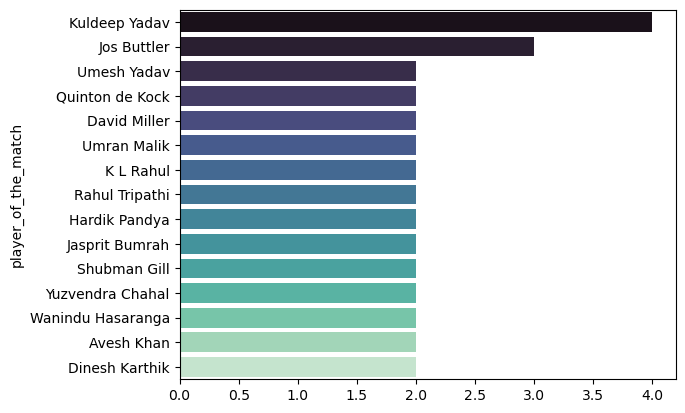

In [31]:
sns.barplot(x=count.values , y = count.index,palette="mako")

# 2 top  scorer

In [32]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


compare - top_scorer and highscore 
when we compare 2 column , use groupby function 

In [33]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: xlabel='top_scorer'>

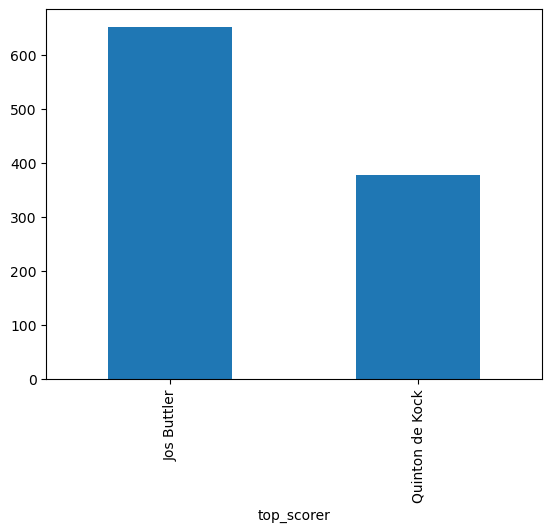

In [34]:
high.plot(kind='bar')

<Axes: ylabel='top_scorer'>

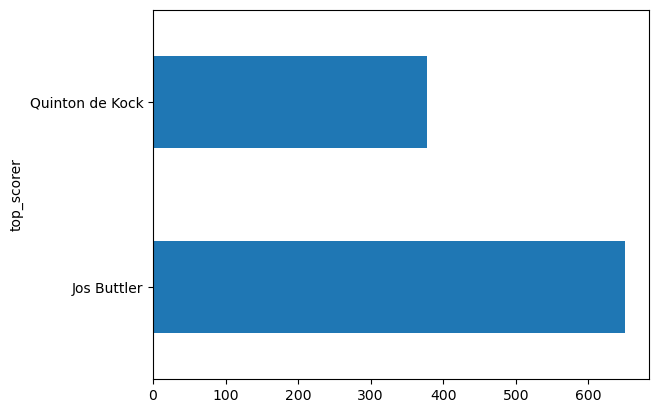

In [35]:
high.plot(kind='barh') # horizontal 

# 10 best Bowling figure 

In [36]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [ ]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)


best_bowling
Yuzvendra Chahal      17
Kuldeep Yadav         11
Rashid Khan           11
Jasprit Bumrah        11
Avesh Khan            10
Josh Hazlewood        10
Kagiso Rabada         10
Wanindu Hasaranga      9
Umran Malik            9
T Natarajan            8
Maheesh Theekshana     7
Lockie Ferguson        7
Andre Russell          7
Mohsin Khan            7
Daniel Sams            7
Dwayne Bravo           6
Prasidh Krishna        6
Harshal Patel          6
Mohammed Shami         5
Umesh Yadav            4
Hardik Pandya          4
Mukesh Choudhary       4
Odean Smith            4
Shardul Takur          4
Ravi Bishnoi           4
Kuldeep Sen            4
Harpreet Brar          3
Moeen Ali              3
Khaleel Ahmed          3
Ramandeep Singh        3
Rahul Chahar           3
Krunal Pandya          3
Prashant Solanki       2
Rilley Meredith        2
Pradeep Sangwan        2
Murugan Ashwin         2
Tim Southee            2
Trent Boult            2
Mohammed Siraj         2
Chetan Sakar

In [41]:
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,...,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26,3
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,...,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14,1
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,...,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43,3
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,...,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22,3


<Axes: ylabel='best_bowling'>

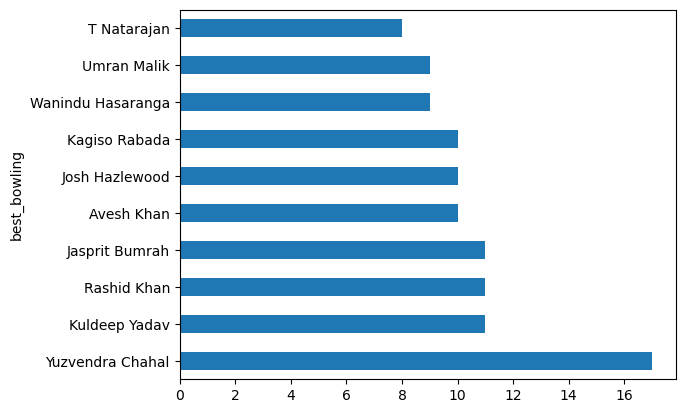

In [47]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh')

# vanue analysis

Most matches played by vanue


In [48]:
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,...,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26,3
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,...,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14,1
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,...,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43,3
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,...,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22,3


In [49]:
vanue_counts = df['venue'].value_counts()
vanue_counts

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

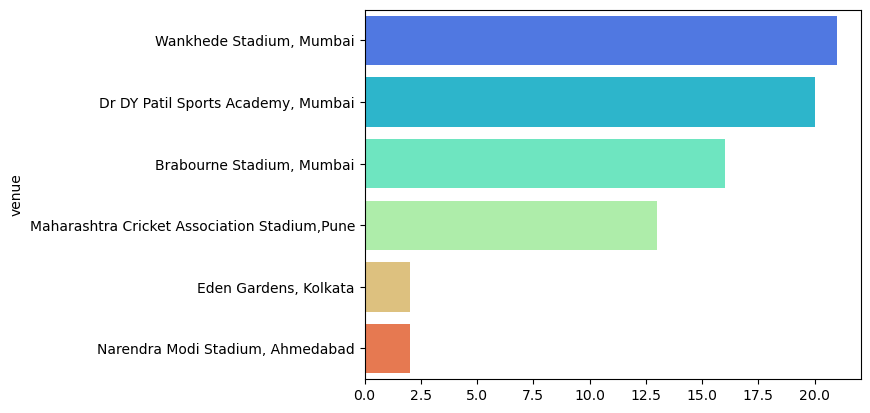

In [52]:
sns.barplot(y=vanue_counts.index,x = vanue_counts.values,palette='rainbow')

# 1. Who won thw highest margin by run ?

In [54]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [58]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


2. Which player has the highest individual score ?

In [63]:
df[df['highscore'] ==  df['highscore'].max()][['top_scorer','highscore']]


,top_scorer,highscore
65,Quinton de Kock,140


3. Which bowler has the highest bowling figure ?

In [67]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling_figure','highest_wickets']]

,best_bowling_figure,highest_wickets
29,5--40,5
39,5--25,5
53,5--18,5
55,5--10,5
